In [1]:
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
tips = pd.read_csv('/users/karolkul/temp/pytand/przyklady/tips.csv')

In [5]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

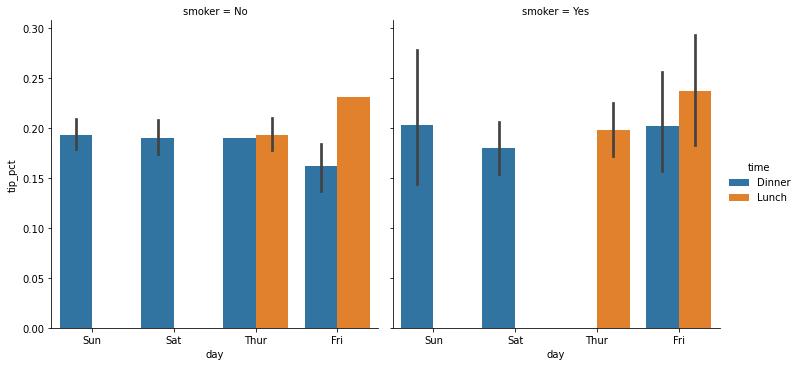

In [6]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

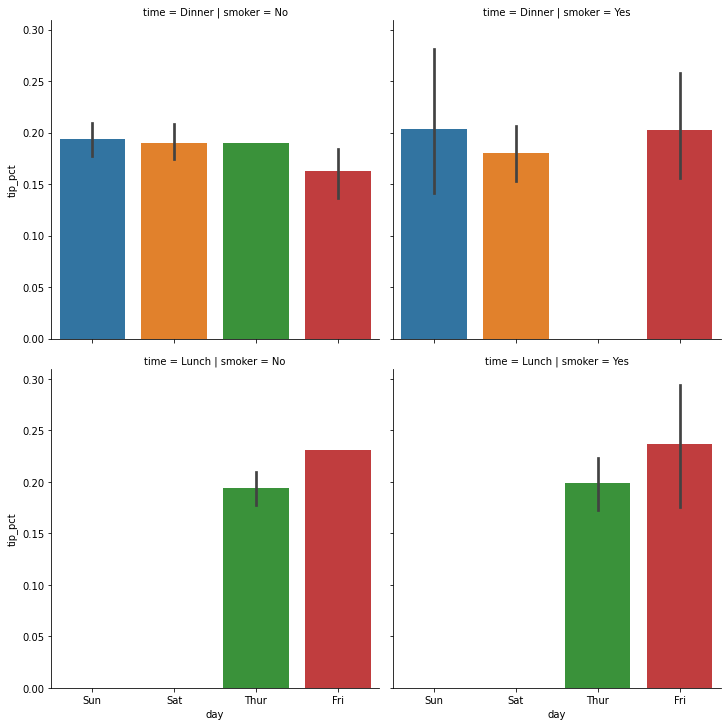

In [7]:
sns.catplot(x='day', y='tip_pct', row='time',
              col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

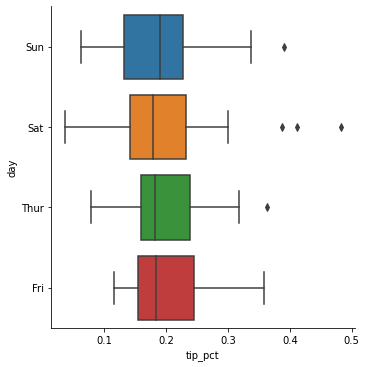

In [8]:
sns.catplot(x='tip_pct', y='day', kind='box',
           data=tips[tips.tip_pct < 0.5])

In [9]:
df = pd.DataFrame({'klucz1': ['a', 'a', 'b', 'b', 'a'],
                  'klucz2': ['jeden', 'dwa', 'jeden', 'dwa', 'jeden'],
                  'dane1': np.random.randn(5),
                  'dane2': np.random.randn(5)})

In [10]:
df

,klucz1,klucz2,dane1,dane2
0,a,jeden,-1.040766,-2.183454
1,a,dwa,-0.418887,-0.596945
2,b,jeden,-0.416922,2.069003
3,b,dwa,0.822337,0.250379
4,a,jeden,1.559353,-0.035798


In [11]:
grouped = df['dane1'].groupby(df['klucz1'])

In [12]:
grouped

In [13]:
grouped.mean()

klucz1
a    0.033233
b    0.202708
Name: dane1, dtype: float64

In [14]:
means = df['dane1'].groupby([df['klucz1'], df['klucz2']]).mean()

In [15]:
means

klucz1  klucz2
a       dwa      -0.418887
        jeden     0.259293
b       dwa       0.822337
        jeden    -0.416922
Name: dane1, dtype: float64

In [16]:
means.unstack()

klucz2,dwa,jeden
klucz1,,
a,-0.418887,0.259293
b,0.822337,-0.416922


In [17]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [18]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [19]:
df.groupby([states, years]).mean()

dane1     dane2
California 2005 -0.418887 -0.596945
           2006 -0.416922  2.069003
Ohio       2005 -0.109215 -0.966538
           2006  1.559353 -0.035798

In [20]:
df.groupby('klucz1').mean()

,dane1,dane2
klucz1,,
a,0.033233,-0.938733
b,0.202708,1.159691


In [21]:
df.groupby(['klucz1', 'klucz2']).mean()

dane1     dane2
klucz1 klucz2                    
a      dwa    -0.418887 -0.596945
       jeden   0.259293 -1.109626
b      dwa     0.822337  0.250379
       jeden  -0.416922  2.069003

In [22]:
df.groupby(['klucz1', 'klucz2']).size()

klucz1  klucz2
a       dwa       1
        jeden     2
b       dwa       1
        jeden     1
dtype: int64

In [23]:
df.groupby(['klucz1']).size()

klucz1
a    3
b    2
dtype: int64

In [24]:
for name, group in df.groupby('klucz1'):
    print(name)
    print(group)

a
  klucz1 klucz2     dane1     dane2
0      a  jeden -1.040766 -2.183454
1      a    dwa -0.418887 -0.596945
4      a  jeden  1.559353 -0.035798
b
  klucz1 klucz2     dane1     dane2
2      b  jeden -0.416922  2.069003
3      b    dwa  0.822337  0.250379


In [25]:
for (k1, k2), group in df.groupby(['klucz1', 'klucz2']):
    print((k1, k2))
    print(group)

('a', 'dwa')
  klucz1 klucz2     dane1     dane2
1      a    dwa -0.418887 -0.596945
('a', 'jeden')
  klucz1 klucz2     dane1     dane2
0      a  jeden -1.040766 -2.183454
4      a  jeden  1.559353 -0.035798
('b', 'dwa')
  klucz1 klucz2     dane1     dane2
3      b    dwa  0.822337  0.250379
('b', 'jeden')
  klucz1 klucz2     dane1     dane2
2      b  jeden -0.416922  2.069003


In [26]:
pieces = dict(list(df.groupby('klucz1')))

In [27]:
pieces['b']

,klucz1,klucz2,dane1,dane2
2,b,jeden,-0.416922,2.069003
3,b,dwa,0.822337,0.250379


In [28]:
df.dtypes

klucz1     object
klucz2     object
dane1     float64
dane2     float64
dtype: object

In [29]:
for dtype, group in grouped:
    print(dtype)
    print(group)

a
0   -1.040766
1   -0.418887
4    1.559353
Name: dane1, dtype: float64
b
2   -0.416922
3    0.822337
Name: dane1, dtype: float64


In [30]:
df.groupby('klucz1')['dane1']

In [31]:
df['dane1'].groupby(df['klucz1'])

In [32]:
df.groupby(['klucz1', 'klucz2'])[['dane2']].mean()

dane2
klucz1 klucz2          
a      dwa    -0.596945
       jeden  -1.109626
b      dwa     0.250379
       jeden   2.069003

In [33]:
s_grouped = df.groupby(['klucz1', 'klucz2'])['dane2']

In [34]:
s_grouped

In [35]:
s_grouped.mean()

klucz1  klucz2
a       dwa      -0.596945
        jeden    -1.109626
b       dwa       0.250379
        jeden     2.069003
Name: dane2, dtype: float64

In [36]:
people = pd.DataFrame(np.random.randn(5, 5),
                     columns=['a', 'b', 'c', 'd', 'e'],
                     index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [37]:
people.iloc[2:3, [1, 2]] = np.nan

In [38]:
people

,a,b,c,d,e
Joe,-1.436417,1.906436,1.371049,1.122892,0.153516
Steve,-0.233397,-0.373861,-0.252881,0.041851,-0.962420
Wes,0.571182,NaN,NaN,-1.211805,-1.073343
Jim,0.674160,0.075730,0.108297,-0.755657,0.268582
Travis,0.007901,-0.853161,-0.263357,-0.543437,0.681124


In [39]:
mapping = {'a': 'czerwony', 'b': 'czerwony', 'c': 'niebieski',
          'd': 'niebieski', 'e': 'czerwony', 'f': 'pomarańczowy'}

In [40]:
by_column = people.groupby(mapping, axis=1)

In [41]:
by_column.sum()

,czerwony,niebieski
Joe,0.623535,2.493941
Steve,-1.569678,-0.211029
Wes,-0.502161,-1.211805
Jim,1.018472,-0.647361
Travis,-0.164136,-0.806795


In [42]:
map_series = pd.Series(mapping)

In [43]:
map_series

a        czerwony
b        czerwony
c       niebieski
d       niebieski
e        czerwony
f    pomarańczowy
dtype: object

In [44]:
people.groupby(map_series, axis=1).count()

,czerwony,niebieski
Joe,3,2
Steve,3,2
Wes,2,1
Jim,3,2
Travis,3,2


In [45]:
people.groupby(len).sum()

,a,b,c,d,e
3,-0.191075,1.982166,1.479346,-0.844571,-0.651245
5,-0.233397,-0.373861,-0.252881,0.041851,-0.962420
6,0.007901,-0.853161,-0.263357,-0.543437,0.681124


In [46]:
key_list = ['jeden', 'jeden', 'jeden', 'dwa', 'dwa']

In [47]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 dwa    0.674160  0.075730  0.108297 -0.755657  0.268582
  jeden -1.436417  1.906436  1.371049 -1.211805 -1.073343
5 jeden -0.233397 -0.373861 -0.252881  0.041851 -0.962420
6 dwa    0.007901 -0.853161 -0.263357 -0.543437  0.681124

In [48]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                   names=['miasto', 'tenor'])

In [49]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [50]:
hier_df

miasto        US                            JP          
tenor          1         3         5         1         3
0      -0.391043  0.983813 -0.515246 -0.002504 -0.983225
1       0.613252 -0.340276  1.018417 -0.233257 -1.016219
2      -0.201774  0.529794 -0.077872 -0.979858 -0.408006
3      -0.558721  0.697270  0.021848 -0.843254 -2.157448

In [51]:
hier_df.groupby(level='miasto', axis=1).count()

miasto,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [52]:
df

,klucz1,klucz2,dane1,dane2
0,a,jeden,-1.040766,-2.183454
1,a,dwa,-0.418887,-0.596945
2,b,jeden,-0.416922,2.069003
3,b,dwa,0.822337,0.250379
4,a,jeden,1.559353,-0.035798


In [53]:
grouped = df.groupby('klucz1')

In [54]:
grouped['dane1'].quantile(0.9)

klucz1
a    1.163705
b    0.698411
Name: dane1, dtype: float64

In [55]:
grouped = df.groupby('klucz1')

In [56]:
grouped['dane1'].quantile(0.9)

klucz1
a    1.163705
b    0.698411
Name: dane1, dtype: float64

In [57]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [58]:
grouped.agg(peak_to_peak)

,dane1,dane2
klucz1,,
a,2.600120,2.147656
b,1.239259,1.818624


In [59]:
grouped.describe()

dane1                                                              \
       count      mean       std       min       25%       50%       75%   
klucz1                                                                     
a        3.0  0.033233  1.357743 -1.040766 -0.729826 -0.418887  0.570233   
b        2.0  0.202708  0.876288 -0.416922 -0.107107  0.202708  0.512522   

                 dane2                                                    \
             max count      mean       std       min       25%       50%   
klucz1                                                                     
a       1.559353   3.0 -0.938733  1.113877 -2.183454 -1.390200 -0.596945   
b       0.822337   2.0  1.159691  1.285961  0.250379  0.705035  1.159691   

                            
             75%       max  
klucz1                      
a      -0.316372 -0.035798  
b       1.614347  2.069003

In [60]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
5,25.29,4.71,No,Sun,Dinner,4,0.228863


In [61]:
grouped = tips.groupby(['day', 'smoker'])

In [62]:
grouped_pct = grouped['tip_pct']

In [63]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.179740
      Yes       0.216293
Sat   No        0.190412
      Yes       0.179833
Sun   No        0.193617
      Yes       0.322021
Thur  No        0.193424
      Yes       0.198508
Name: tip_pct, dtype: float64

In [64]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.179740  0.039458      0.094263
     Yes     0.216293  0.077530      0.242219
Sat  No      0.190412  0.058626      0.352192
     Yes     0.179833  0.089496      0.446137
Sun  No      0.193617  0.060302      0.274897
     Yes     0.322021  0.538061      2.382107
Thur No      0.193424  0.056065      0.284273
     Yes     0.198508  0.057170      0.219047

In [65]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.179740  0.039458
     Yes     0.216293  0.077530
Sat  No      0.190412  0.058626
     Yes     0.179833  0.089496
Sun  No      0.193617  0.060302
     Yes     0.322021  0.538061
Thur No      0.193424  0.056065
     Yes     0.198508  0.057170

In [66]:
functions = ['count', 'mean', 'max']

In [67]:
result = grouped[['tip_pct', 'total_bill']].agg(functions)

In [68]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.179740  0.231125          4  18.420000  22.75
     Yes         15  0.216293  0.357737         15  16.813333  40.17
Sat  No          45  0.190412  0.412409         45  19.661778  48.33
     Yes         42  0.179833  0.483092         42  21.276667  50.81
Sun  No          57  0.193617  0.338101         57  20.506667  48.17
     Yes         19  0.322021  2.452381         19  24.120000  45.35
Thur No          45  0.193424  0.362976         45  17.113111  41.19
     Yes         17  0.198508  0.317965         17  19.190588  43.11

In [69]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.179740  0.231125
     Yes        15  0.216293  0.357737
Sat  No         45  0.190412  0.412409
     Yes        42  0.179833  0.483092
Sun  No         57  0.193617  0.338101
     Yes        19  0.322021  2.452381
Thur No         45  0.193424  0.362976
     Yes        17  0.198508  0.317965

In [70]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

In [71]:
grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.179740   0.001557    18.420000   25.596333
     Yes        0.216293   0.006011    16.813333   82.562438
Sat  No         0.190412   0.003437    19.661778   79.908965
     Yes        0.179833   0.008010    21.276667  101.387535
Sun  No         0.193617   0.003636    20.506667   66.099980
     Yes        0.322021   0.289509    24.120000  109.046044
Thur No         0.193424   0.003143    17.113111   59.625081
     Yes        0.198508   0.003268    19.190588   69.808518

In [72]:
grouped.agg({'tip': np.max, 'size': 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [73]:
grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'],
            'size': 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.136861  0.231125  0.179740  0.039458    9
     Yes     0.115518  0.357737  0.216293  0.077530   31
Sat  No      0.060217  0.412409  0.190412  0.058626  115
     Yes     0.036955  0.483092  0.179833  0.089496  104
Sun  No      0.063204  0.338101  0.193617  0.060302  167
     Yes     0.070274  2.452381  0.322021  0.538061   49
Thur No      0.078704  0.362976  0.193424  0.056065  112
     Yes     0.098918  0.317965  0.198508  0.057170   40

In [74]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.179740
1,Fri,Yes,16.813333,2.714000,2.066667,0.216293
2,Sat,No,19.661778,3.102889,2.555556,0.190412
3,Sat,Yes,21.276667,2.875476,2.476190,0.179833
4,Sun,No,20.506667,3.167895,2.929825,0.193617
5,Sun,Yes,24.120000,3.516842,2.578947,0.322021
6,Thur,No,17.113111,2.673778,2.488889,0.193424
7,Thur,Yes,19.190588,3.030000,2.352941,0.198508


In [75]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [76]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
232,11.61,3.39,No,Sat,Dinner,2,0.412409
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


In [77]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.310180
       185       20.69  5.00     No   Sun  Dinner     5  0.318674
       51        10.29  2.60     No   Sun  Dinner     2  0.338101
       149        7.51  2.00     No  Thur   Lunch     2  0.362976
       232       11.61  3.39     No   Sat  Dinner     2  0.412409
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.387973
       183       23.17  6.50    Yes   Sun  Dinner     4  0.389922
       67         3.07  1.00    Yes   Sat  Dinner     1  0.483092
       178        9.60  4.00    Yes   Sun  Dinner     2  0.714286
       172        7.25  5.15    Yes   Sun  Dinner     2  2.452381

In [78]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.166667
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.228833
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.115821
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.138160
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.133465
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.245038
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.083632
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.131199

In [79]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [80]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.192237,0.057665,0.060217,0.158622,0.184308,0.227015,0.412409
Yes,93.0,0.218176,0.254295,0.036955,0.119534,0.181818,0.242326,2.452381


In [81]:
f = lambda x: x.describe()

In [82]:
grouped.apply(f)

total_bill       tip  size   tip_pct
day  smoker                                            
Fri  No     count    4.000000  4.000000  4.00  4.000000
            mean    18.420000  2.812500  2.25  0.179740
            std      5.059282  0.898494  0.50  0.039458
            min     12.460000  1.500000  2.00  0.136861
            25%     15.100000  2.625000  2.00  0.159215
...                       ...       ...   ...       ...
Thur Yes    min     10.340000  2.000000  2.00  0.098918
            25%     13.510000  2.000000  2.00  0.173762
            50%     16.470000  2.560000  2.00  0.181818
            75%     19.810000  4.000000  2.00  0.241984
            max     43.110000  5.000000  4.00  0.317965

[64 rows x 4 columns]

In [83]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.310180
185,20.69,5.00,No,Sun,Dinner,5,0.318674
51,10.29,2.60,No,Sun,Dinner,2,0.338101
149,7.51,2.00,No,Thur,Lunch,2,0.362976
232,11.61,3.39,No,Sat,Dinner,2,0.412409
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


In [84]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                     'data2': np.random.randn(1000)})

In [85]:
quartiles = pd.cut(frame.data1, 4)

In [86]:
quartiles[:10]

0     (0.349, 1.981]
1    (-1.282, 0.349]
2     (0.349, 1.981]
3    (-1.282, 0.349]
4    (-1.282, 0.349]
5    (-2.92, -1.282]
6    (-1.282, 0.349]
7    (-1.282, 0.349]
8    (-1.282, 0.349]
9    (-1.282, 0.349]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.92, -1.282] < (-1.282, 0.349] < (0.349, 1.981] < (1.981, 3.612]]

In [87]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
           'count': group.count(), 'mean': group.mean()}

In [88]:
grouped = frame.data2.groupby(quartiles)

In [89]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-2.92, -1.282]",-3.217190,2.155702,106.0,0.085605
"(-1.282, 0.349]",-3.057688,3.692012,536.0,-0.026343
"(0.349, 1.981]",-2.687979,2.883203,328.0,0.084125
"(1.981, 3.612]",-2.085635,2.120792,30.0,-0.080941


In [90]:
grouping = pd.qcut(frame.data1, 10, labels=False)

In [91]:
grouped = frame.data2.groupby(grouping)

In [92]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-3.217190,2.155702,100.0,0.043205
1,-3.057688,2.537821,100.0,0.057188
2,-2.893370,2.547439,100.0,-0.209283
3,-2.330846,2.111072,100.0,-0.034478
4,-2.755062,2.943241,100.0,0.088358
5,-1.952151,3.692012,100.0,0.075003
6,-2.246927,1.948866,100.0,0.002206
7,-2.035588,2.883203,100.0,0.105259
8,-2.687979,2.365807,100.0,0.126013


In [93]:
s = pd.Series(np.random.randn(6))

In [94]:
s[::2] = np.nan

In [95]:
s

0         NaN
1    1.092350
2         NaN
3    0.405708
4         NaN
5   -0.845999
dtype: float64

In [96]:
s.fillna(s.mean())

0    0.217353
1    1.092350
2    0.217353
3    0.405708
4    0.217353
5   -0.845999
dtype: float64

In [97]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
         'Oregon', 'Nevada', 'California', 'Idaho']

In [98]:
group_key = ['East'] * 4 + ['West'] * 4

In [99]:
data = pd.Series(np.random.randn(8), index=states)

In [100]:
data

Ohio          1.516081
New York     -0.458781
Vermont      -0.900418
Florida      -0.029290
Oregon       -0.717185
Nevada        0.061720
California    1.368001
Idaho         0.175702
dtype: float64

In [101]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [102]:
data

Ohio          1.516081
New York     -0.458781
Vermont            NaN
Florida      -0.029290
Oregon       -0.717185
Nevada             NaN
California    1.368001
Idaho              NaN
dtype: float64

In [103]:
data.groupby(group_key).mean()

East    0.342670
West    0.325408
dtype: float64

In [104]:
fill_mean = lambda g: g.fillna(g.mean())

In [105]:
data.groupby(group_key).apply(fill_mean)

Ohio          1.516081
New York     -0.458781
Vermont       0.342670
Florida      -0.029290
Oregon       -0.717185
Nevada        0.325408
California    1.368001
Idaho         0.325408
dtype: float64

In [106]:
fill_values = {'East': 0.5, 'West': -1}

In [107]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [108]:
data.groupby(group_key).apply(fill_func)

Ohio          1.516081
New York     -0.458781
Vermont       0.500000
Florida      -0.029290
Oregon       -0.717185
Nevada       -1.000000
California    1.368001
Idaho        -1.000000
dtype: float64

In [109]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [110]:
suits = ['H', 'S', 'C', 'D']

In [111]:
card_val = (list(range(1, 11)) + [10] * 3) * 4

In [112]:
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']

In [113]:
cards= []

In [114]:
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

In [115]:
deck = pd.Series(card_val, index=cards)

In [116]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [117]:
def draw(deck, n=5):
    return deck.sample(n)

In [118]:
draw(deck)

QS    10
AD     1
8S     8
9H     9
JD    10
dtype: int64

In [119]:
get_suit = lambda card: card[-1]

In [120]:
deck.groupby(get_suit).apply(draw, n=2)

C  JC    10
   AC     1
D  QD    10
   2D     2
H  5H     5
   KH    10
S  2S     2
   8S     8
dtype: int64

In [121]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

3C     3
9C     9
5D     5
JD    10
9H     9
3H     3
7S     7
3S     3
dtype: int64

In [122]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                               'b', 'b', 'b', 'b'],
                  'data': np.random.randn(8),
                  'weights': np.random.randn(8)})

In [123]:
df

,category,data,weights
0,a,1.751617,0.011504
1,a,-0.597841,1.208615
2,a,0.976601,-0.062869
3,a,0.211444,-1.597732
4,b,-0.666193,0.875014
5,b,-0.374997,0.159738
6,b,-0.154563,-1.107334
7,b,0.109919,0.720776


In [124]:
grouped = df.groupby('category')

In [125]:
grouped

In [126]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [127]:
grouped.apply(get_wavg)

category
a    2.500985
b   -0.605451
dtype: float64

In [128]:
close_px = pd.read_csv('/users/karolkul/temp/pytand/przyklady/stock_px_2.csv', parse_dates=True,
                      index_col=0)

In [129]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [130]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [131]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [132]:
rets = close_px.pct_change().dropna()

In [133]:
get_year = lambda x: x.year

In [134]:
by_year = rets.groupby(get_year)

In [135]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [136]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [137]:
import statsmodels.api as sm

In [138]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params

In [139]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [140]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.179740   18.420000
     Yes     2.066667  2.714000  0.216293   16.813333
Sat  No      2.555556  3.102889  0.190412   19.661778
     Yes     2.476190  2.875476  0.179833   21.276667
Sun  No      2.929825  3.167895  0.193617   20.506667
     Yes     2.578947  3.516842  0.322021   24.120000
Thur No      2.488889  2.673778  0.193424   17.113111
     Yes     2.352941  3.030000  0.198508   19.190588

In [141]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.162612  0.202545
       Sat   2.555556  2.476190  0.190412  0.179833
       Sun   2.929825  2.578947  0.193617  0.322021
       Thur  2.000000       NaN  0.190114       NaN
Lunch  Fri   3.000000  1.833333  0.231125  0.236915
       Thur  2.500000  2.352941  0.193499  0.198508

In [142]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.162612  0.202545  0.192562
       Sat   2.555556  2.476190  2.517241  0.190412  0.179833  0.185305
       Sun   2.929825  2.578947  2.842105  0.193617  0.322021  0.225718
       Thur  2.000000       NaN  2.000000  0.190114       NaN  0.190114
Lunch  Fri   3.000000  1.833333  2.000000  0.231125  0.236915  0.236088
       Thur  2.500000  2.352941  2.459016  0.193499  0.198508  0.194895
All          2.668874  2.408602  2.569672  0.192237  0.218176  0.202123

In [143]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [144]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.160000  0.000000  0.000000
            Yes     0.000000  0.483092  0.000000  0.000000
       2    No      0.162612  0.198319  0.206535  0.190114
            Yes     0.211180  0.178877  0.400522  0.000000
       3    No      0.000000  0.183870  0.182962  0.000000
            Yes     0.000000  0.176599  0.183278  0.000000
       4    No      0.000000  0.177734  0.175289  0.000000
            Yes     0.133465  0.147074  0.254373  0.000000
       5    No      0.000000  0.000000  0.263344  0.000000
            Yes     0.000000  0.119284  0.070274  0.000000
       6    No      0.000000  0.000000  0.115821  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.222087
            Yes     0.288288  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.201503
            Yes     0.226641  0.000000  0.000000  0.191197
       3    No      0.231125  0.000000  0.000000  0.092162
            Yes     0.000000  0.000000  0.000000  0.257941
       4    No      0.000000  0.000000  0.000000  0.161573
            Yes     0.000000  0.000000  0.000000  0.186592
       5    No      0.000000  0.000000  0.000000  0.138160
       6    No      0.000000  0.000000  0.000000  0.211191

In [145]:
data

Ohio          1.516081
New York     -0.458781
Vermont            NaN
Florida      -0.029290
Oregon       -0.717185
Nevada             NaN
California    1.368001
Idaho              NaN
dtype: float64

In [146]:
data = pd.DataFrame({'Sample': np.arange(3),
                    'Nationality': ['USA', 'JAPAN', 'USA'],
                    'Handedness': ['L-Hand', 'R-Hand', 'R-Hand']})

In [147]:
data

,Sample,Nationality,Handedness
0,0,USA,L-Hand
1,1,JAPAN,R-Hand
2,2,USA,R-Hand


In [148]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,L-Hand,R-Hand,All
Nationality,,,
JAPAN,0,1,1
USA,1,1,2
All,1,2,3


In [149]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244